# MIE1624 A3: Mean-Variance Optimazation

# 1.In-sample Markowitz Efficient Frontiers

In [167]:
# pip install cvxpy
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings("ignore")

In [168]:
#Load dataset
#In Sample: 25 companies monthly stock price from 2018.01-2020.12 in total 36 months
df1 = pd.read_csv('monthly_closings_2018_to_2020.csv')
#Out Sample: 25 companies monthly stock price in 2021 in total 12 months
df2 = pd.read_csv('monthly_closings_2021.csv')

price = df1.iloc[:,1:]

#calculate percentage change, which is monthly returns
ret = price.pct_change().iloc[1:,:]
ret.reset_index(inplace = True, drop = True)

In [169]:
ret

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,-0.045856,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
1,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,-0.103914,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
2,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,0.076413,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
3,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,0.115000,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
4,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,0.013244,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863
5,0.222815,0.011998,0.055701,0.009163,-0.093044,0.095424,0.033677,0.039346,0.098506,-0.111877,...,0.035770,0.079300,0.041623,-0.027211,0.030164,0.027983,0.022398,0.028582,0.103167,0.032390
6,0.373159,-0.048374,0.013596,-0.065267,-0.042503,0.001619,0.037981,0.168711,0.081932,0.018252,...,0.060185,-0.006594,0.023773,-0.131469,0.057807,0.196227,-0.034751,-0.028198,0.002198,0.074228
7,0.227255,0.028797,-0.026474,-0.058568,-0.024262,-0.047527,0.045529,0.076116,-0.011115,-0.064132,...,-0.009014,0.005700,0.023662,-0.132045,-0.004608,-0.004825,0.017464,0.010144,-0.015186,0.023321
8,-0.410489,-0.175474,-0.042908,-0.136441,0.032432,-0.062018,-0.121217,0.023424,-0.053605,-0.077040,...,-0.014314,-0.097053,-0.151222,-0.152134,-0.084312,-0.030478,-0.107185,-0.082438,-0.033853,-0.081551
9,0.169687,0.047711,0.026256,0.130588,0.003041,0.032727,0.075839,-0.291277,0.109264,-0.073654,...,0.076564,0.092820,0.144812,0.560175,-0.002650,-0.184045,-0.015634,0.069483,0.027047,0.028002


In [170]:
# Covariance matrix
Q = ret.cov().to_numpy()

# Compute 25 means for company
mu = np.array(np.mean(ret, axis = 0))
n = 25

In [171]:
# Minimum Variance Portfolio 
w1 = cp.Variable(n)
constraints1 = [sum(w1) == 1 , w1 >= 0]
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)) , constraints1)

#Solve Problem
prob1.solve(verbose=False)

0.0009278939303461067

In [172]:
w_minVar = w1.value #weights
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar)) #variance
ret_minVar = np.dot(mu, w_minVar) #expected return

In [173]:
# Maximum Return Portfolio
w2 = cp.Variable(n)
constraints2 = [sum(w2) == 1, w2 >= 0]
prob2 = cp.Problem(cp.Maximize(mu.T@w2), constraints2)

# Solve the problem 
prob2.solve(verbose=False)

0.10211634693131111

In [174]:
w_maxRet = w2.value #weights
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet)) #variance
ret_maxRet = np.dot(mu, w_maxRet) #expected return

Classic Efficient Frontier

In [175]:
targetLen = 50  #tareget ranges for portfolio returns
targetRet = np.linspace(ret_minVar,ret_maxRet,targetLen)

w = cp.Variable(n)
eps = cp.Parameter()

constraints3 = [mu.T@w >= eps,sum(w) == 1,w >= 0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)), constraints3)

w_front_clas = []
var_front_clas = []
ret_front_clas = []
for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve()
    w_front_clas.append(w.value)
    var_front_clas.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front_clas.append(np.dot(mu, w.value))

Resampled Efficient Frontier

In [207]:
sample_size = ret.shape[0] 
repetition = 100

w_re_cla = []
var_re_cla = []
ret_re_cla = []
#store resampled Q & mu
Q_resample_list = []
mu_resample_list = []

#store minimum variance
var_minVar_list = []
ret_minVar_list = []
#store maximum expected return
var_maxRet_list = []
ret_maxRet_list = []


np.random.seed(10)

#Resample by taking n (sample size) draws from the original input
for i in range(repetition):
    
    #resample by drawing from the multivariate normal distribution with mu and Q    
    x_resample = np.random.multivariate_normal(mu, Q, sample_size)
    
    #Calculate the new mean vector (mu_resample) and new variance-covariance matrix (Q _resample) 
    #resampled mu and Q
    df_x = pd.DataFrame(data = x_resample)
    mu_resample = np.array(np.mean(df_x, axis = 0))
    Q_resample = df_x.cov().to_numpy()
    Q_resample_list.append(Q_resample)
    mu_resample_list.append(mu_resample)
    
    
     #Compute minimum variance
    w_minVar = w1.value #solution value: minimum variance
    var_minVar = np.dot(w_minVar, np.dot(Q_resample, w_minVar)) #variance
    ret_minVar = np.dot(mu_resample, w_minVar) #expected return
    var_minVar_list.append(var_minVar)
    ret_minVar_list.append(ret_minVar)

    
    #compute maximum expected return
    w_maxRet = w2.value #solution value: maximum expected return
    var_maxRet = np.dot(w_maxRet, np.dot(Q_resample, w_maxRet)) #variance
    ret_maxRet = np.dot(mu_resample, w_maxRet) #expected return
    var_maxRet_list.append(var_maxRet)
    ret_maxRet_list.append(ret_maxRet)

    #target return
    targetRet = np.linspace(ret_minVar,ret_maxRet,50)
    
    # Define optimization problem and compute one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()
    
    constraints4 = [mu_resample.T@w_re >= eps_re,sum(w_re) == 1,w_re >= 0]
    prob4 = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints4)
    
    # Compute efficient frontier
    w_front_re = []
    var_front_re = []
    ret_front_re = []
    for epsilon in targetRet:
        eps_re.value = epsilon
        prob4.solve()
        w_front_re.append(w_re.value)
        var_front_re.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
        ret_front_re.append(np.dot(mu_resample, w_re.value))
        
    
    #Store results for each resampling
    w_re_cla.append(w_front_re)
    var_re_cla.append(var_front_re)
    ret_re_cla.append(ret_front_re)
    
#compute the average weights at each return level
w_re_mean = np.array(np.mean(w_re_cla, axis = 0))    


In [177]:

#compute the resampled efficient frontier based on the average weights and orignial mu & Q
var_re_ef = []
ret_re_ef = []
for i in range(0,50):  
    var_tep = np.dot(w_re_mean[i], np.dot(Q, w_re_mean[i]))
    ret_tep = np.dot(mu, w_re_mean[i])
    var_re_ef.append(var_tep)
    ret_re_ef.append(ret_tep)

# 2. 6 Portfolios Comparison

In classic efficient frontier, find the minimum variance, maximum return, and Sharpe ratio portfolio weights.

In [178]:
#Weights on minimum variance and Maximum return portfolios

#Min variance
orig_weights_minVar = w_front_clas[0]
print('Weights on minimum variance portfolio:')
print(orig_weights_minVar)

#Max return 
orig_weights_maxRet = w_front_clas[-1]
print('\n Weights on maximum return portfolio:')
print(orig_weights_maxRet)

Weights on minimum variance portfolio:
[ 3.27230514e-19 -1.14168501e-20 -8.31476257e-22  1.11997349e-19
  1.90859691e-20  1.70010969e-20 -2.67206636e-20  8.07691367e-20
  5.54485957e-02  8.99769245e-20  9.08772714e-20  6.59194971e-01
  9.71734393e-20  3.48208987e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25235299e-20 -1.26901397e-20  4.97870966e-20
  4.42499270e-20  2.33153316e-20  9.01180838e-02  8.74735709e-21
  4.98748717e-02]

 Weights on maximum return portfolio:
[-1.31075269e-15 -6.16528539e-15 -5.19951772e-15 -4.94667076e-15
 -5.26860930e-15 -5.16434209e-15 -6.33874698e-15 -5.85370259e-15
 -5.49013629e-15 -4.51579498e-15 -3.84817773e-15 -4.82621158e-15
  5.15958422e-09 -4.59747759e-15 -6.38732563e-15 -4.54605481e-15
 -5.74461164e-15 -6.86109638e-15  9.99999995e-01 -4.24601328e-15
 -3.09630928e-15 -5.91825243e-15 -5.46379763e-15 -4.93574474e-15
 -4.31381808e-15]


In [179]:
riskFreeRate = 0.002

#Compute sharp ratio 
ret_array_clas = np.array(ret_front_clas)
var_array_clas = np.array(var_front_clas)

sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

weights_sharpe_clas = w_front_clas[sharpe_array_clas.argmax()]
print('All sharpe ratios:')
print(sharpe_array_clas)
print('\n Index of highest sharp ratio portfolio:', sharpe_array_clas.argmax())
print('\n Weights of highest sharpe ratio portfolio:')
print(weights_sharpe_clas)

All sharpe ratios:
[0.21841729 0.27800793 0.32774795 0.36827174 0.4008275  0.42613411
 0.44630936 0.46246746 0.47543186 0.48587106 0.49430315 0.50103627
 0.5064046  0.51069581 0.51411326 0.51665943 0.51848227 0.5197395
 0.52055446 0.52102369 0.52122284 0.52121134 0.52103597 0.52073366
 0.52033363 0.51985904 0.5193283  0.51875604 0.51815393 0.51753126
 0.51689544 0.51625237 0.51560673 0.51496224 0.51432183 0.51368778
 0.5130289  0.51215006 0.50586457 0.49160956 0.47226911 0.45041653
 0.42794104 0.40604084 0.38566114 0.3420309  0.28395628 0.23536734
 0.19889106 0.17176165]

 Index of highest sharp ratio portfolio: 20

 Weights of highest sharpe ratio portfolio:
[ 3.03160097e-01 -2.51104684e-22 -2.18834623e-22 -9.98195762e-22
  2.80063553e-22  1.40269759e-22  1.05222599e-22  1.36537702e-21
  8.22330413e-22  1.19218622e-22 -1.36878928e-22  4.07725910e-01
  1.68209250e-01 -4.02460862e-22  1.73977686e-21 -1.13658312e-21
 -6.17327472e-22  6.85033555e-22  2.27436297e-02  1.41718742e-22
  9.816

In resampled efficient frontier, find the minimum variance, maximum return, and Sharpe ratio portfolio weights.

In [180]:
#Weights on minimum variance and Maximum return portfolios

#Min variance
re_weights_minVar = w_re_mean[0]
print('Weights on minimum variance portfolio:')
print(re_weights_minVar)

#Max return 
re_weights_maxRet = w_re_mean[-1]
print('\n Weights on maximum return portfolio:')
print(re_weights_maxRet)

Weights on minimum variance portfolio:
[1.18833694e-04 8.22788708e-05 4.39528789e-22 3.14852039e-03
 4.11171951e-03 6.41408417e-21 2.17810566e-20 6.07880629e-03
 3.93656373e-02 4.10733102e-20 7.36619587e-03 6.27957896e-01
 4.93381725e-05 1.92320144e-02 8.22776385e-03 9.64655736e-02
 5.43689891e-02 1.99571894e-04 8.17066586e-04 8.48417849e-21
 1.90183873e-03 2.95789703e-20 6.80782000e-02 1.39289144e-02
 4.85008411e-02]

 Weights on maximum return portfolio:
[ 8.59273806e-02 -1.29628582e-06 -1.14014583e-06  6.20483126e-03
  2.50690995e-03 -1.19442986e-06 -1.42547713e-06  1.58370811e-03
  7.39130949e-03  6.52436489e-03  6.00827890e-03  1.95024768e-01
  1.14375415e-01  1.00770392e-02  1.13497461e-03  5.17016664e-02
  1.71518392e-02 -1.45684441e-06  3.96728859e-01 -1.00112308e-06
  3.63788814e-02 -1.21424160e-06  2.19583090e-02  7.72471861e-03
  3.16054759e-02]


In [181]:
riskFreeRate = 0.002

#Compute sharp ratio 
ret_re_array = np.array(ret_re_ef)
var_re_array = np.array(var_re_ef)

sharpe_re_clas = (ret_re_array - riskFreeRate)/np.sqrt(var_re_ef)

weights_re_sharpe = w_re_mean[sharpe_re_clas.argmax()]
print('All sharpe ratios:')
print(sharpe_re_clas)
print('\n Index of highest sharpe ratio portfolio:', sharpe_re_clas.argmax())
print('\n Weights of highest sharpe ratio portfolio:')
print(weights_re_sharpe)

All sharpe ratios:
[0.2278788  0.24556851 0.26978777 0.29274949 0.31445254 0.33473952
 0.35300519 0.36883772 0.38282855 0.39482204 0.40500956 0.4136533
 0.4213151  0.4279571  0.43369774 0.43883789 0.44339885 0.44751475
 0.45113922 0.45424815 0.45684758 0.45890016 0.46061221 0.46162136
 0.46203493 0.46227649 0.46113891 0.45893528 0.45607238 0.45220503
 0.44739207 0.4410382  0.43302134 0.42435407 0.41513006 0.4046765
 0.39420496 0.38364312 0.37269758 0.36208475 0.35146797 0.3408743
 0.32929276 0.31829181 0.30605054 0.29304615 0.2806719  0.2693746
 0.25900558 0.24570656]

 Index of highest sharpe ratio portfolio: 25

 Weights of highest sharpe ratio portfolio:
[ 1.96905772e-01  9.05233044e-19 -4.13477013e-19  9.35694700e-03
  4.84559711e-03 -6.97820204e-19 -4.78552266e-19  2.54870855e-03
  9.40246355e-03  7.18155293e-03  1.11583674e-02  2.99042139e-01
  1.27681500e-01  1.71750453e-02  2.84333998e-03  7.91477068e-02
  1.95090955e-02 -6.91127275e-19  6.09605459e-02  1.78880716e-18
  7.09494

Out Sample Expectation

In [182]:
price2021 = df2.iloc[:,1:]

price2021_ = price2021.drop(price2021.index[1:11])
price2021_.reset_index(inplace = True, drop = True)

#Compute percent change, the yearly return
ret_2021 = price2021_.pct_change().iloc[1:,:]

ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


In [183]:
#Classical frontier find

#Rate of return on Minimum variance portfolio
orig_minVar_ret2021 = np.dot(ret_2021, orig_weights_minVar)
print(orig_minVar_ret2021)


#Rate of return on Maximum return portfolio
orig_maxRet_ret2021 = np.dot(ret_2021, orig_weights_maxRet)
print(orig_maxRet_ret2021)

#Rate of return on Sharpe ratio portfolio
orig_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas)
print(orig_sharpe_ret2021)


[0.02822425]
[-0.58459094]
[0.27958832]


In [184]:
#Compute returns on $1000

print('Out-of-sample returns on $1000 investment: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , orig_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , orig_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , orig_sharpe_ret2021*1000 , '\n')

Out-of-sample returns on $1000 investment: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22424688]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-584.59094047]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.5883226] 



In [185]:
#Resampled frontier find

#Rate of return on Minimum variance portfolio
re_minVar_ret2021 = np.dot(ret_2021, re_weights_minVar)
print(re_minVar_ret2021)


#Rate of return on Maximum return portfolio
re_maxRet_ret2021 = np.dot(ret_2021, re_weights_maxRet)
print(re_maxRet_ret2021)

#Rate of return on Sharpe ratio portfolio
re_sharpe_ret2021 = np.dot(ret_2021, weights_re_sharpe)
print(re_sharpe_ret2021)


[0.0651822]
[-0.08668626]
[0.22518455]


In [186]:
#Compute returns on $1000

print('Out-of-sample returns on $1000 investment: \n')
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , re_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , re_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , re_sharpe_ret2021*1000)

Out-of-sample returns on $1000 investment: 

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [65.18219508]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [-86.68626416]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [225.18455496]


# 3. Classical & Resampled Efficient Frontier

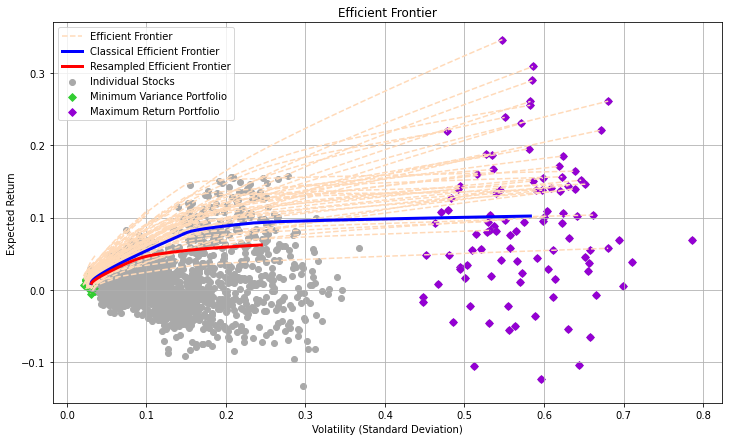

In [219]:
axC = plt.gca()
plt.rcParams['figure.figsize'] = [9, 8]

for i in range(repetition):
    # Plot volatility versus expected return for individual stocks
    axC.scatter(x=np.sqrt(np.diag(Q_resample_list[i])), y=mu_resample_list[i], color='darkgray', label='Individual Stocks' if i == 0 else "")
    
    # Plot volatility versus expected return for mimimum variance portfolio
    axC.scatter(x=np.sqrt(var_minVar_list[i]), y=ret_minVar_list[i], marker='D', s=30,  color='limegreen', label='Minimum Variance Portfolio' if i == 0 else "")

    # Plot volatility versus expected return for maximum return portfolio
    axC.scatter(x=np.sqrt(var_maxRet_list[i]), y=ret_maxRet_list[i],  marker='D', s=30, color='darkviolet', label='Maximum Return Portfolio' if i == 0 else "")

    # Plot efficient frontier
    axC.plot(np.sqrt(var_re_cla[i]), ret_re_cla[i], '--', color='peachpuff', label='Efficient Frontier' if i == 0 else "")

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_front_clas), ret_front_clas, color='blue', linewidth=3, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_re_ef), ret_re_ef, color='red', linewidth=3, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="upper left")
axC.grid()
plt.show()


# 4. Classical & Resampled Portfolio Compositions

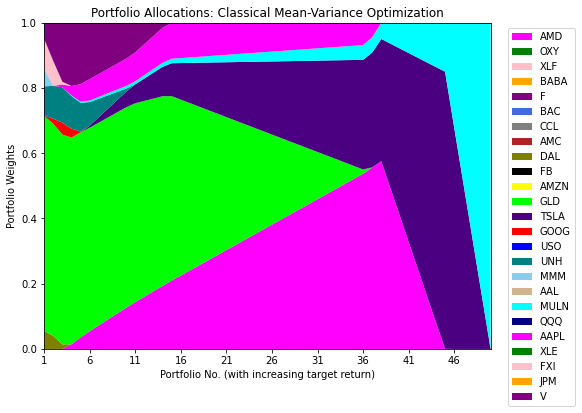

In [216]:
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_front_clas).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

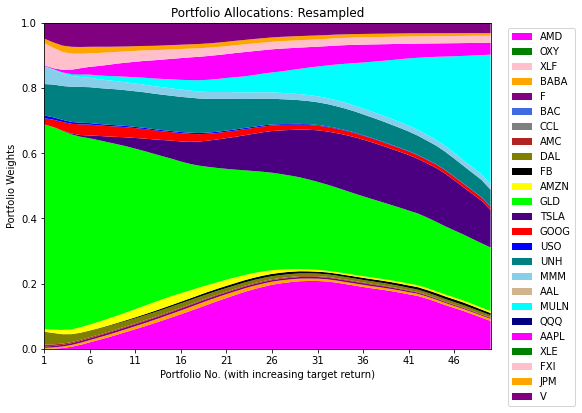

In [217]:
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_re_mean).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled")
plt.show()